C:\Users\shekaul\AppData\Local\Continuum\anaconda3\envs\coursera\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 28, 28) (50000,)


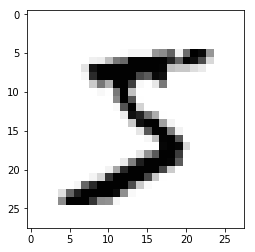

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_train = X_train.reshape((50000,28*28))

In [3]:
X_test = X_test.reshape((10000, 28*28))

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)


(50000, 784)
(10000, 784)
[5 0 4 ... 8 4 8]
[7 2 1 ... 4 5 6]


In [5]:
import tensorflow as tf

In [6]:
tf.reset_default_graph()

input_X = tf.placeholder(dtype=tf.float32, name = 'input_X', shape=(None,784))
input_y = tf.placeholder(dtype=tf.float32, name = 'input_X', shape=(None,10))
keep_prob = tf.placeholder(dtype=tf.float32)

In [7]:
W1 = tf.get_variable('W1', shape=(784,128), initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable('b1', shape=(1, 128), initializer=tf.zeros_initializer())
W2 = tf.get_variable('W2', shape=(128,128), initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable('b2', shape=(1,128), initializer=tf.zeros_initializer())
W3 = tf.get_variable('W3', shape=(128,10), initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable('b3', shape=(1,10), initializer=tf.zeros_initializer())


In [8]:
z1 = tf.matmul(input_X,W1) + b1
a1 = tf.nn.relu(z1)
a1 = tf.nn.dropout(a1, keep_prob=keep_prob)
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.relu(z2)
a2 = tf.nn.dropout(a2, keep_prob=keep_prob)
z3 = tf.matmul(a2, W3) + b3
a3 = tf.nn.sigmoid(z3)


In [9]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=a3) )

In [10]:
print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [11]:
global_step = tf.Variable(0, trainable=False)
learning_rate= tf.train.exponential_decay(0.00036, global_step, 100, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [12]:
import numpy as np
y_train_onehot = np.eye(10)[y_train.astype(int)]
y_test_onehot = np.eye(10)[y_test.astype(int)]


In [13]:
y_train_onehot.shape

(50000, 10)

Train loss after 10 epochs: 1.5157865
Test loss after 10 epochs: 1.515472
Train loss after 20 epochs: 1.4969345
Test loss after 20 epochs: 1.5001142
Train loss after 30 epochs: 1.4867278
Test loss after 30 epochs: 1.4917338
Train loss after 40 epochs: 1.4808028
Test loss after 40 epochs: 1.4876089
Train loss after 50 epochs: 1.4769795
Test loss after 50 epochs: 1.4848745
Train loss after 60 epochs: 1.4741136
Test loss after 60 epochs: 1.482971
Train loss after 70 epochs: 1.4722103
Test loss after 70 epochs: 1.4818896
Train loss after 80 epochs: 1.4706953
Test loss after 80 epochs: 1.4807419
Train loss after 90 epochs: 1.4694148
Test loss after 90 epochs: 1.4801687
Train loss after 100 epochs: 1.4685408
Test loss after 100 epochs: 1.4798303
Train loss after 110 epochs: 1.4678093
Test loss after 110 epochs: 1.4794418
Train loss after 120 epochs: 1.4671787
Test loss after 120 epochs: 1.4795357
Train loss after 130 epochs: 1.4666868
Test loss after 130 epochs: 1.4791421
Train loss after 14

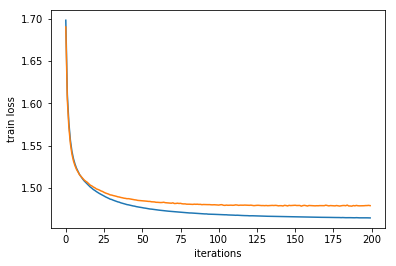

Train Accuracy: 0.99658
Test Accuracy: 0.9789


In [14]:
batch_size = 500
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_loss = []
    test_loss  = []
    for epoch in range(200):
        for i in range(0, 50000, 500):
            sess.run(optimizer, feed_dict={input_X:X_train[i: i+batch_size], input_y:y_train_onehot[i: i+batch_size], keep_prob:0.65})
        train_loss.append(sess.run(loss, feed_dict={input_X:X_train, input_y:y_train_onehot, keep_prob:1.0}))
        test_loss.append(sess.run(loss, feed_dict={input_X:X_test, input_y:y_test_onehot, keep_prob:1.0}))
        if epoch%10 == 9:
            print("Train loss after " + str(epoch+1)+ " epochs: "+ str(train_loss[-1]))
            print("Test loss after " + str(epoch+1)+ " epochs: "+ str(test_loss[-1]))
    plt.plot(range(200), train_loss, label='Train')
    plt.plot(range(200), test_loss, label='Test')
    plt.ylabel('train loss')
    plt.xlabel('iterations')
    plt.show()

    predictions = tf.argmax(a3, 1)
    correct_predictions = tf.equal(predictions, tf.argmax(input_y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    train_accuracy = accuracy.eval({input_X: X_train, input_y: y_train_onehot, keep_prob : 1})
    test_accuracy = accuracy.eval({input_X: X_test, input_y: y_test_onehot, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

                
            